## Limpieza de datos

In [2]:
import numpy as np
import pandas as pd

In [3]:
moon = pd.read_csv('data/lunardata.txt',
                   converters={'month': '{:0>2}'.format, 'day': '{:0>2}'.format})
moon.head()


,year,month,day,luna
0,1992,01,04,0
1,1992,01,05,1
2,1992,01,06,2
3,1992,01,07,3
4,1992,01,08,4


In [5]:
#creo la columna date con el mismo formato que la existente en el dataframe seizures
moon['date'] = (moon['year'].astype(str) + moon['month'].astype(str) + moon['day'].astype(str)).astype(int)
moon.head()

,year,month,day,luna,date
0,1992,01,04,0,19920104
1,1992,01,05,1,19920105
2,1992,01,06,2,19920106
3,1992,01,07,3,19920107
4,1992,01,08,4,19920108


In [4]:
seizures = pd.read_csv('data/mora.csv')
seizures.head()

,id,date,int
0,1,20211204,1
1,2,20211206,2
2,3,20211207,1
3,4,20211207,1
4,5,20211209,1


In [6]:
# uno ambos datafames en uno nuevo
conc = pd.merge(seizures, moon, on="date")
conc.head()

,id,date,int,year,month,day,luna
0,1,20211204,1,2021,12,04,1
1,2,20211206,2,2021,12,06,3
2,3,20211207,1,2021,12,07,4
3,4,20211207,1,2021,12,07,4
4,5,20211209,1,2021,12,09,6


In [7]:
#creo una columna con el tipo de luna
def moon_type(i):
    if(i < 10):
        return 'New Moon'
    elif(i>=10 and i < 20):
        return 'First Quarter'
    elif(i>=20 and i<30):
        return 'Full Moon'
    else:
        return 'Third Quarter'


conc['moon_type'] = conc['luna'].map(moon_type)

conc.head()


,id,date,int,year,month,day,luna,moon_type
0,1,20211204,1,2021,12,04,1,New Moon
1,2,20211206,2,2021,12,06,3,New Moon
2,3,20211207,1,2021,12,07,4,New Moon
3,4,20211207,1,2021,12,07,4,New Moon
4,5,20211209,1,2021,12,09,6,New Moon


## Analisis

In [71]:
count_moontype = conc.groupby('moon_type')['int'].count().reset_index().set_axis(['Moon Type', 'Count'], axis=1)
count_moontype

,Moon Type,Count
0,First Quarter,7
1,Full Moon,16
2,New Moon,9
3,Third Quarter,4


In [72]:
count_month = conc.groupby('month')['int'].count().reset_index().set_axis(['Month', 'Count'], axis=1)
count_month


,Month,Count
0,02,3
1,03,2
2,06,4
3,07,1
4,11,1
5,12,25


In [73]:
count_year = conc.groupby('year')['int'].count().reset_index().set_axis(['Year', 'Count'], axis=1)
count_year


,Year,Count
0,2021,25
1,2022,8
2,2023,3


In [88]:
group_year = conc.groupby(by=['year', 'month'])['int'].count(
).reset_index().set_axis(['Year', 'Month', 'Count'], axis=1)
group_year

,Year,Month,Count
0,2021,12,25
1,2022,02,3
2,2022,03,2
3,2022,06,1
4,2022,07,1
5,2022,11,1
6,2023,06,3


## Visualización

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Moon type percentages')

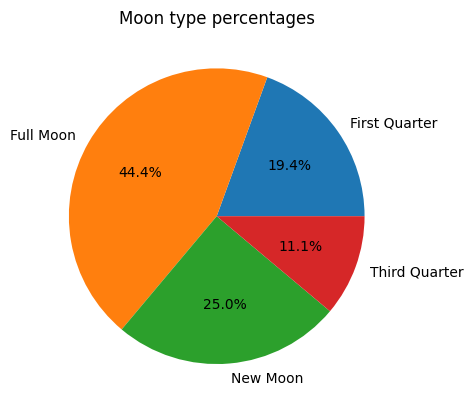

In [86]:

plt.pie(
    count_moontype['Count'],
    labels=count_moontype['Moon Type'],
    autopct='%1.1f%%',
)

plt.title('Moon type percentages')


Text(0.5, 1.0, 'Seizures count by month')

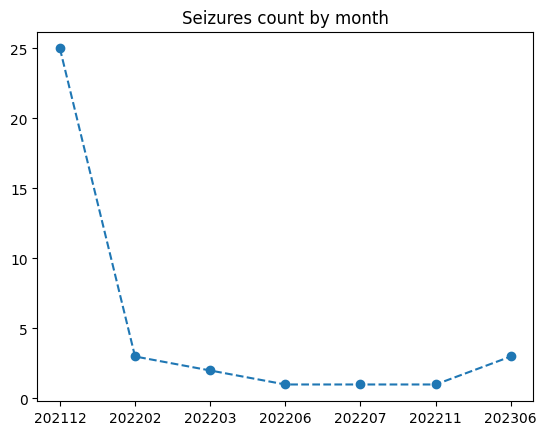

In [97]:
group_year['full_date'] = group_year['Year'].astype('str')+group_year['Month']

plt.plot_date(
    group_year['full_date'],
    group_year['Count'], 
    linestyle='--',
)

plt.title('Seizures count by month')

Text(0.5, 1.0, 'Moon type percentages without counting Dec-2021')

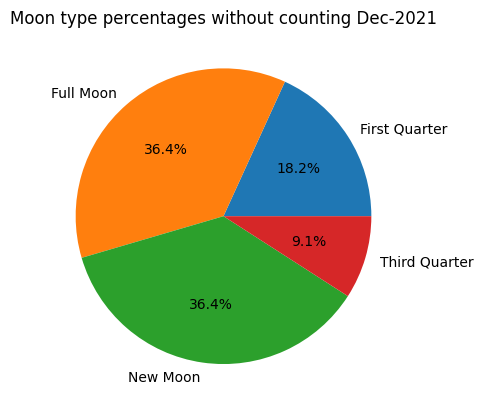

In [95]:
count_moontype_no2021 = conc[conc['year'] > 2021].groupby('moon_type')['int'].count(
).reset_index().set_axis(['Moon Type', 'Count'], axis=1)
# count_moontype_no2021

plt.pie(
    count_moontype_no2021['Count'],
    labels=count_moontype_no2021['Moon Type'],
    autopct='%1.1f%%',
)

plt.title('Moon type percentages without counting Dec-2021')


In [209]:
x = conc[conc['year'] == 2021].groupby('date').count()['id'].reset_index()


def full_moon(i):
    if (i >= 20 and i < 30):
        return 1
    else:
        return 0

x

,date,id
0,20211204,1
1,20211206,1
2,20211207,2
3,20211209,1
4,20211210,1
5,20211211,1
6,20211212,1
7,20211214,1
8,20211216,1
9,20211218,4


In [225]:
y = conc[conc['year'] == 2021].drop_duplicates(subset='date', keep="last")
y['luna'] = y['luna'].map(full_moon)
y = y.drop(['id', 'int', 'year', 'month', 'day', 'moon_type'], axis=1)

y



,date,luna
0,20211204,0
1,20211206,0
3,20211207,0
4,20211209,0
5,20211210,0
6,20211211,0
7,20211212,0
8,20211214,0
9,20211216,0
13,20211218,1


In [231]:
z = pd.merge(x, y, on="date")
z


,date,id,luna
0,20211204,1,0
1,20211206,1,0
2,20211207,2,0
3,20211209,1,0
4,20211210,1,0
5,20211211,1,0
6,20211212,1,0
7,20211214,1,0
8,20211216,1,0
9,20211218,4,1


In [242]:
z['id'].corr(z['luna'])

0.46088240084927007